In [574]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [575]:
# load and investigate the data here:
data = pd.read_csv('tennis_stats.csv')
df = pd.DataFrame(data)

In [576]:
# perform exploratory analysis here:

In [577]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [578]:
df.shape

(1721, 24)

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

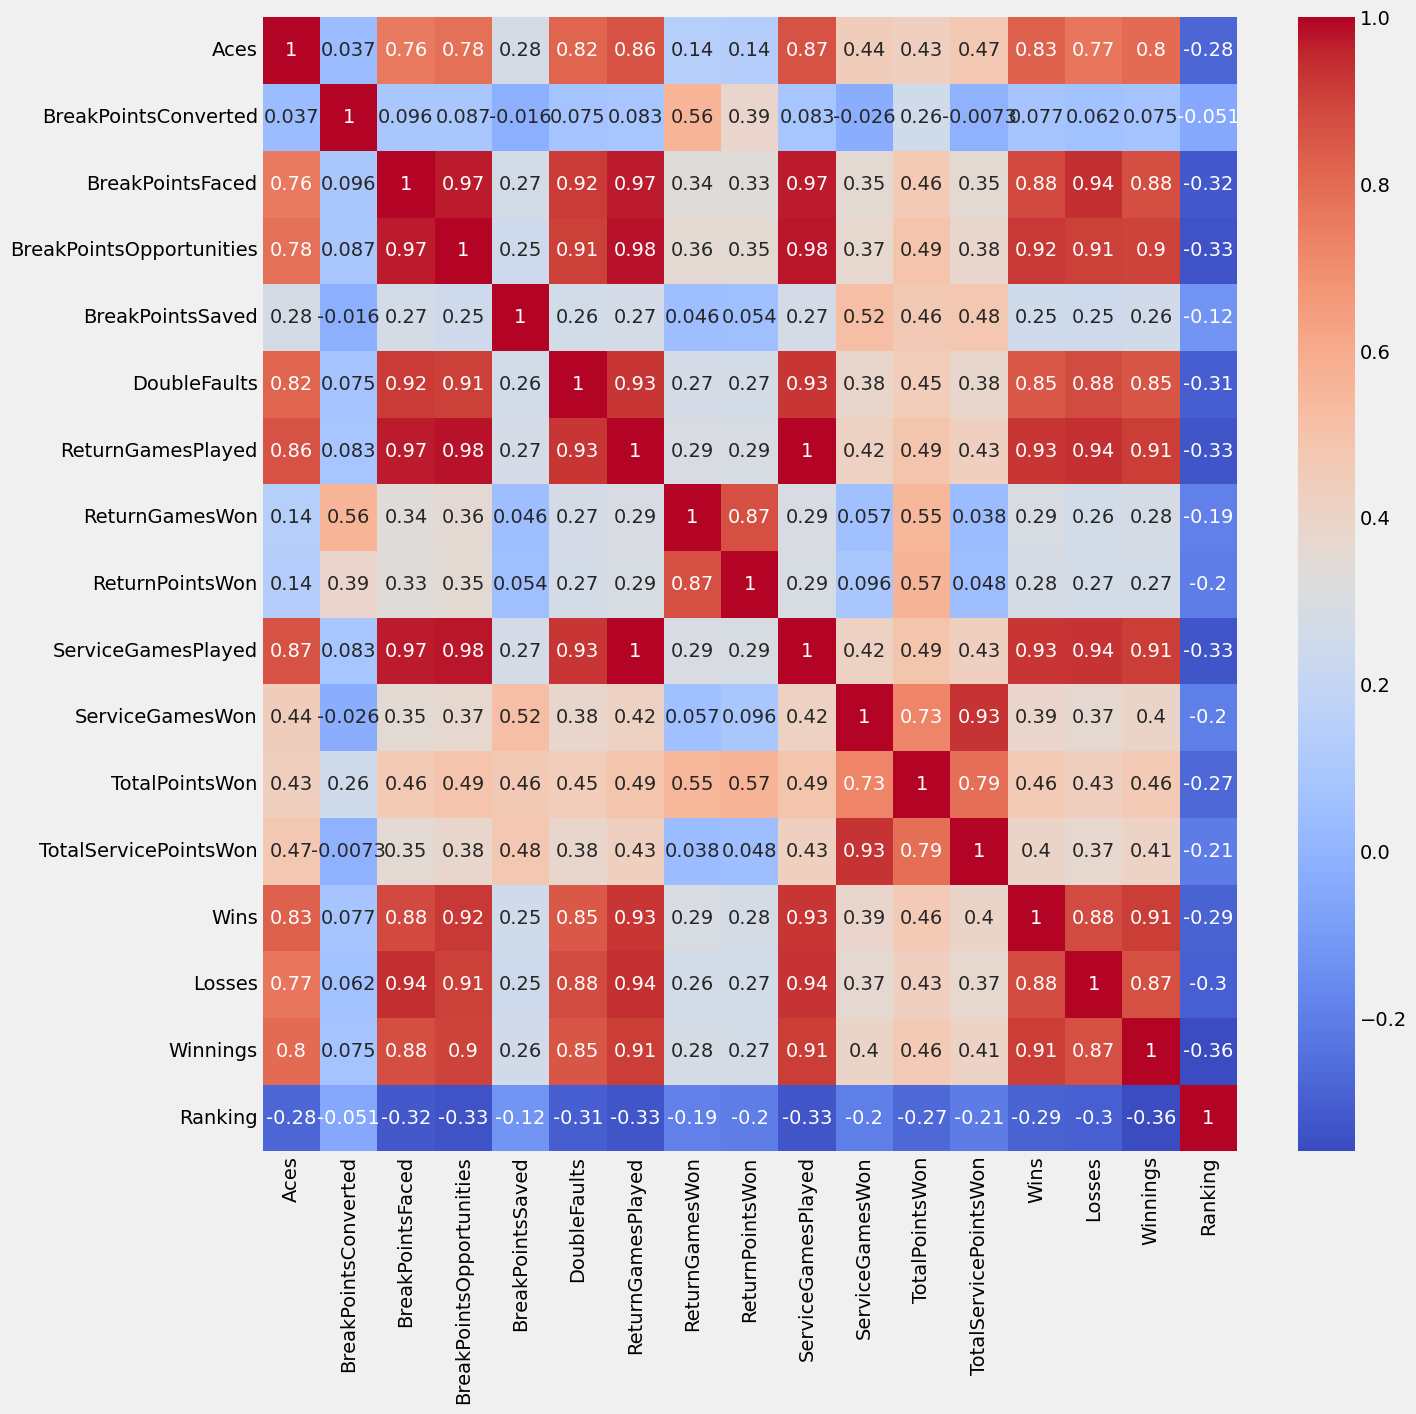

<Figure size 640x480 with 0 Axes>

In [580]:
plt.figure(figsize=[14, 14])
sns.heatmap(df[df.columns.to_list()[7:]].corr(), annot=True, cmap='coolwarm')
plt.show()
plt.clf()

In [581]:
## perform single feature linear regressions here:

In [582]:
columns = df.columns.to_list()[7:23]

In [583]:
df.Year.unique()

array([2016, 2017, 2010, 2014, 2011, 2009, 2012, 2013, 2015], dtype=int64)

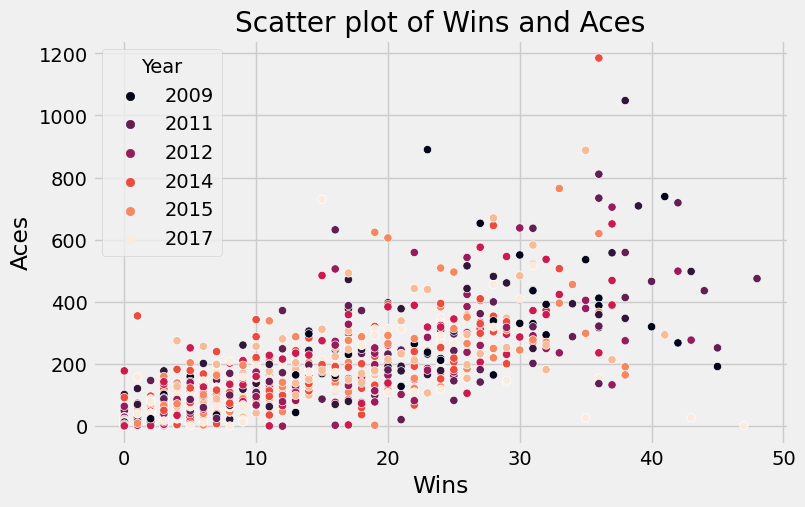

<Figure size 640x480 with 0 Axes>

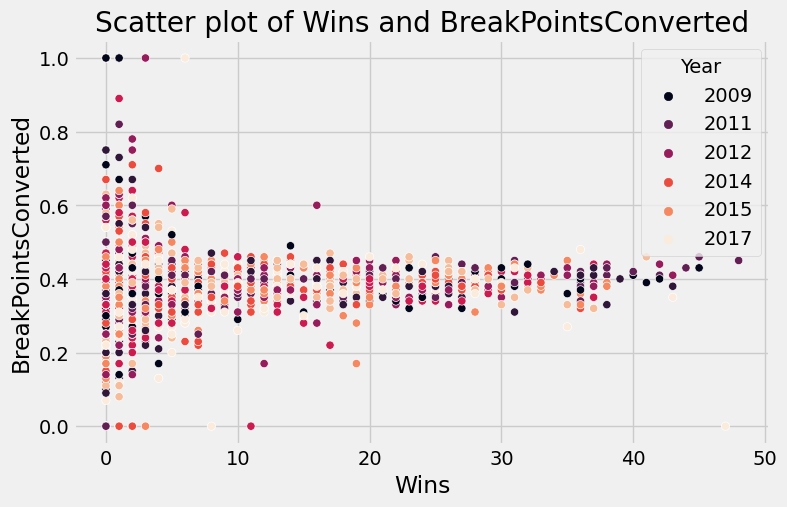

<Figure size 640x480 with 0 Axes>

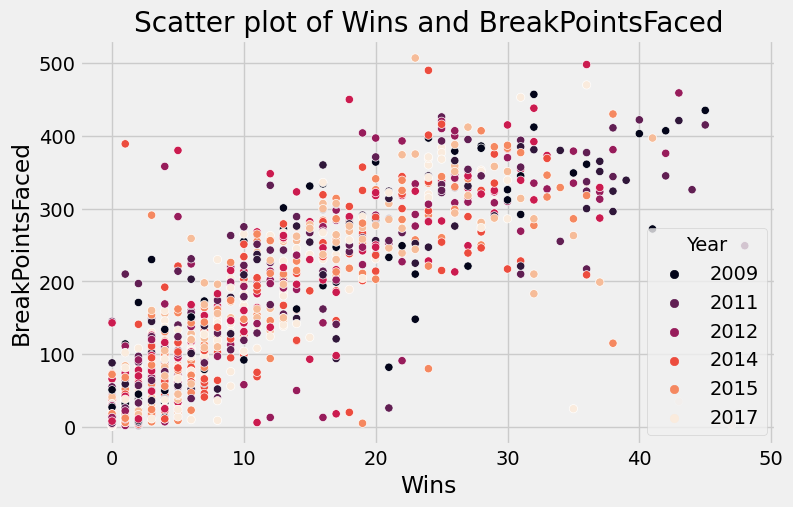

<Figure size 640x480 with 0 Axes>

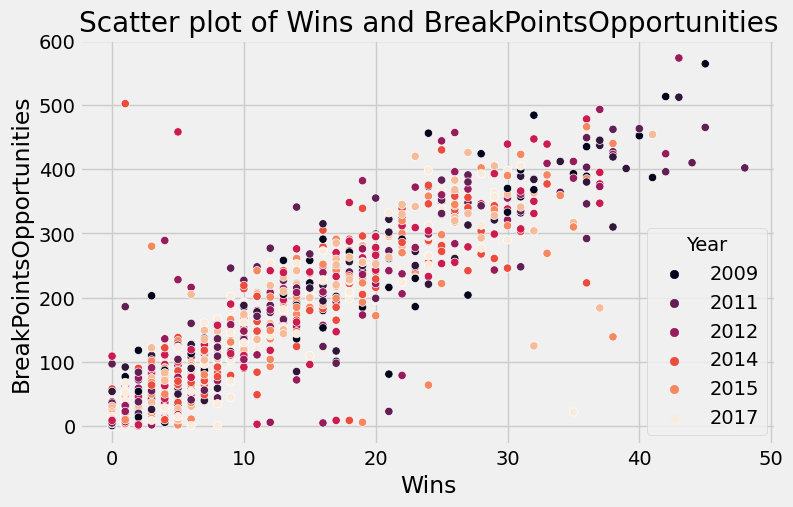

<Figure size 640x480 with 0 Axes>

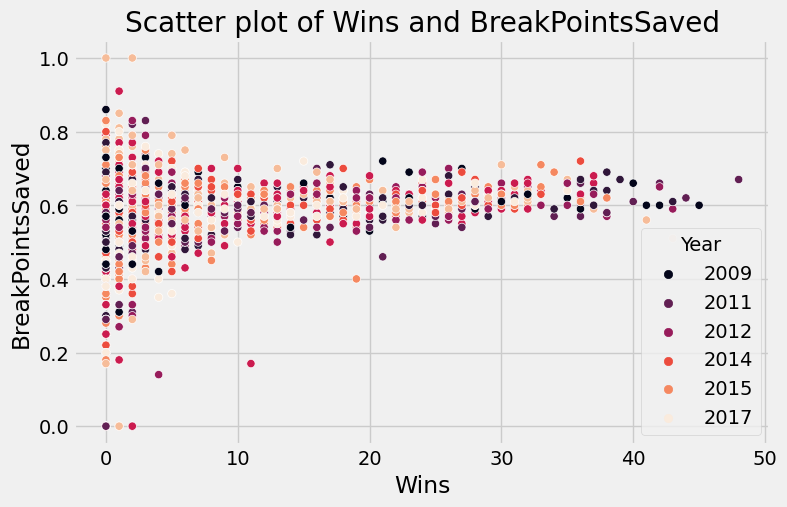

<Figure size 640x480 with 0 Axes>

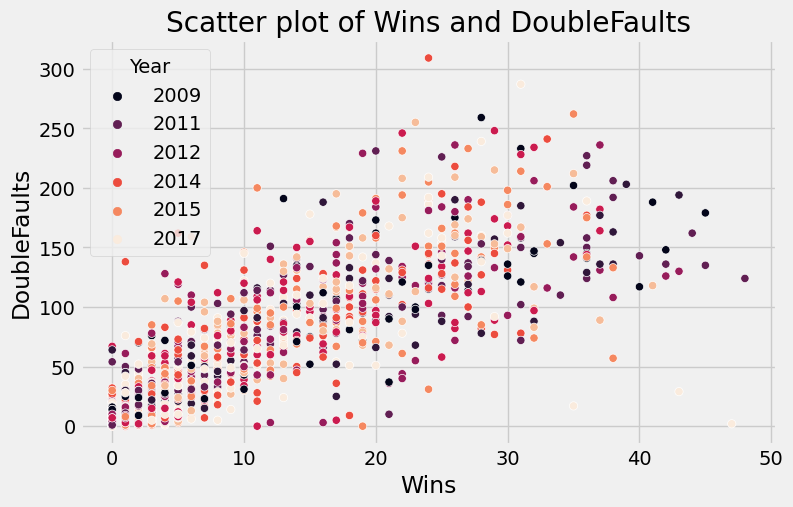

<Figure size 640x480 with 0 Axes>

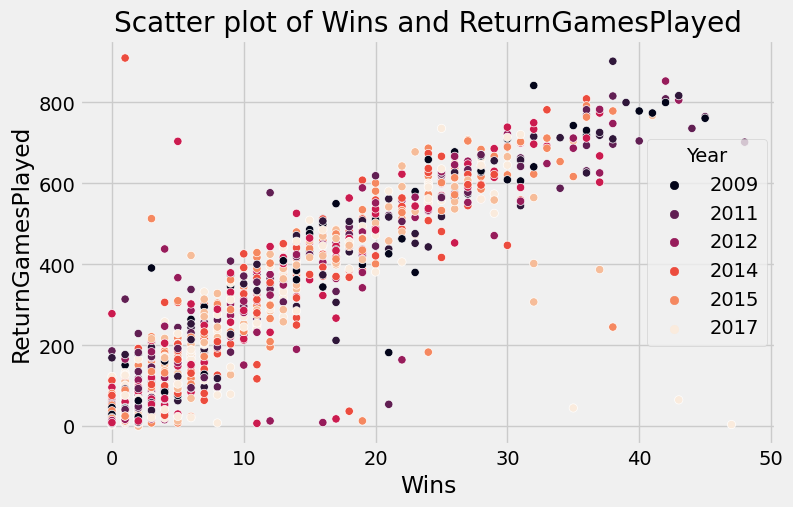

<Figure size 640x480 with 0 Axes>

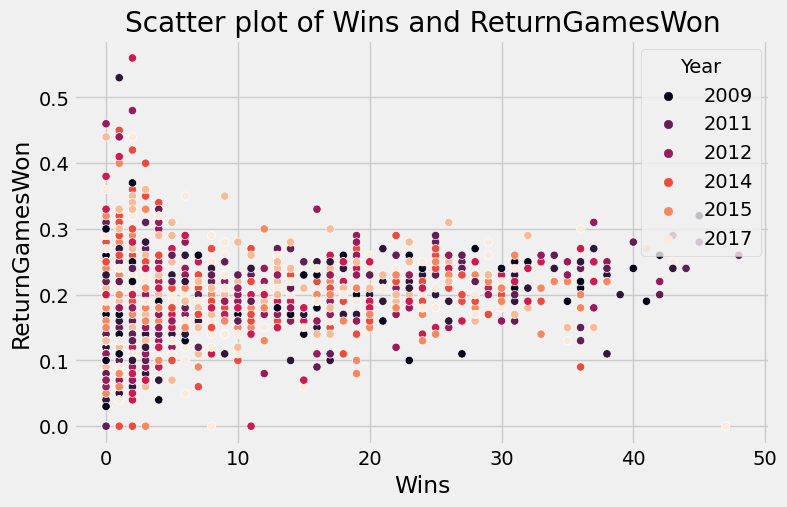

<Figure size 640x480 with 0 Axes>

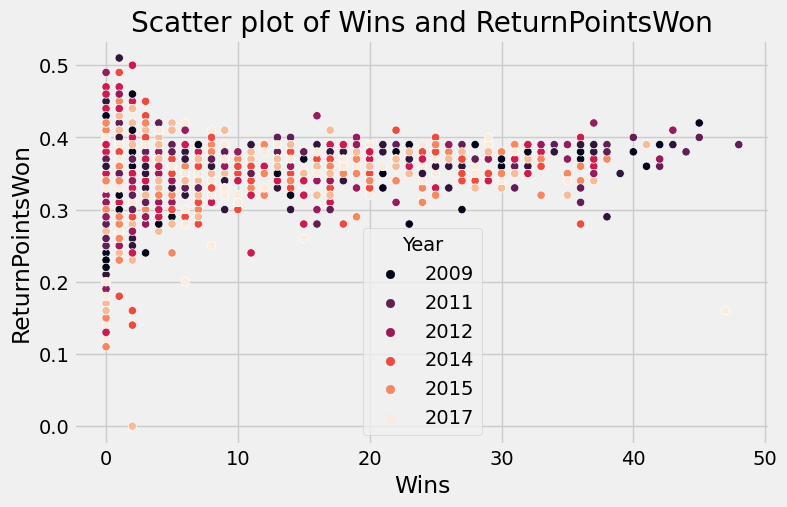

<Figure size 640x480 with 0 Axes>

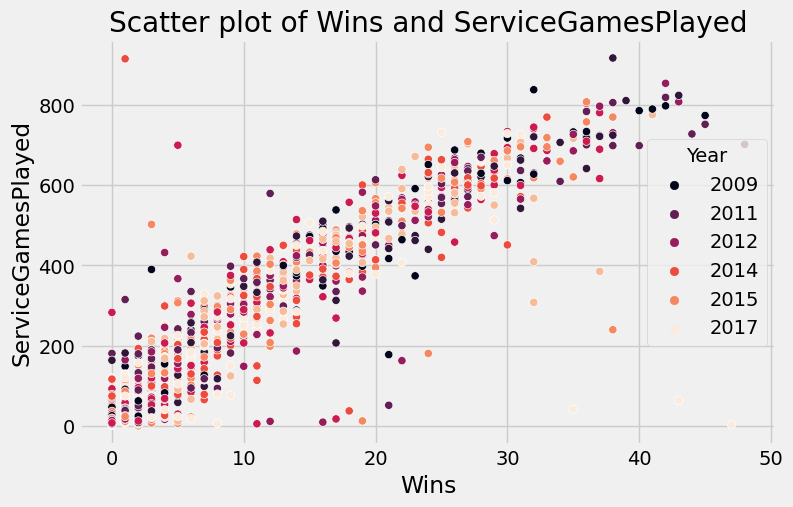

<Figure size 640x480 with 0 Axes>

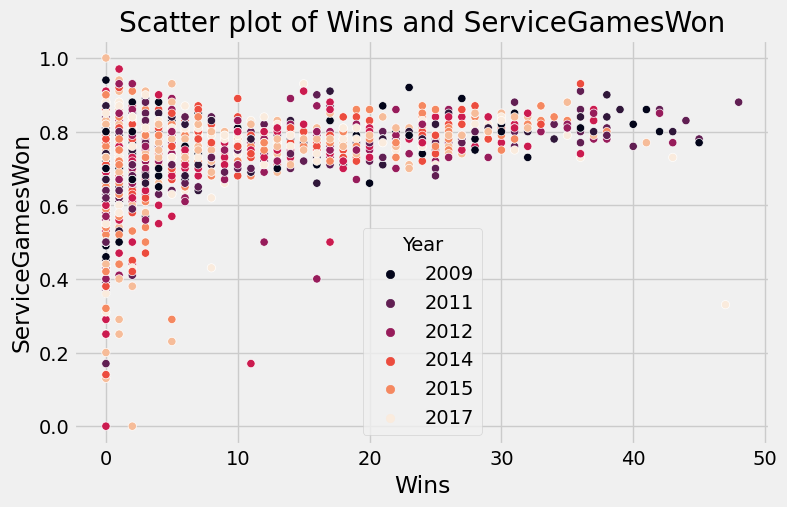

<Figure size 640x480 with 0 Axes>

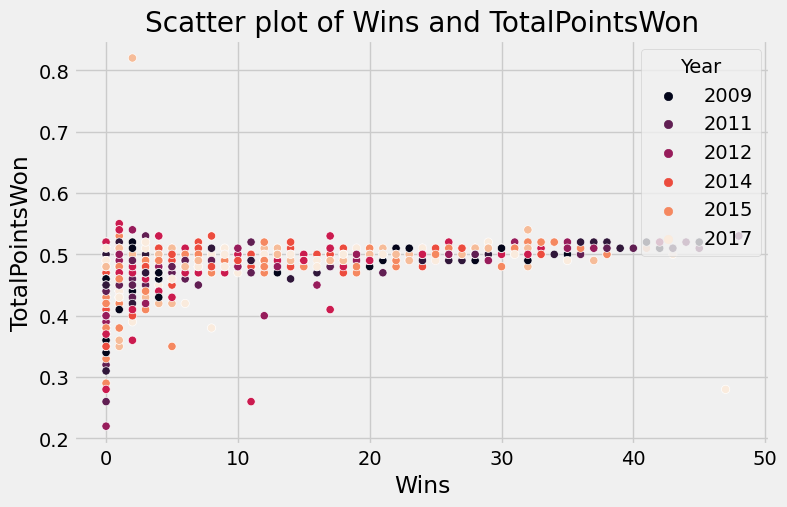

<Figure size 640x480 with 0 Axes>

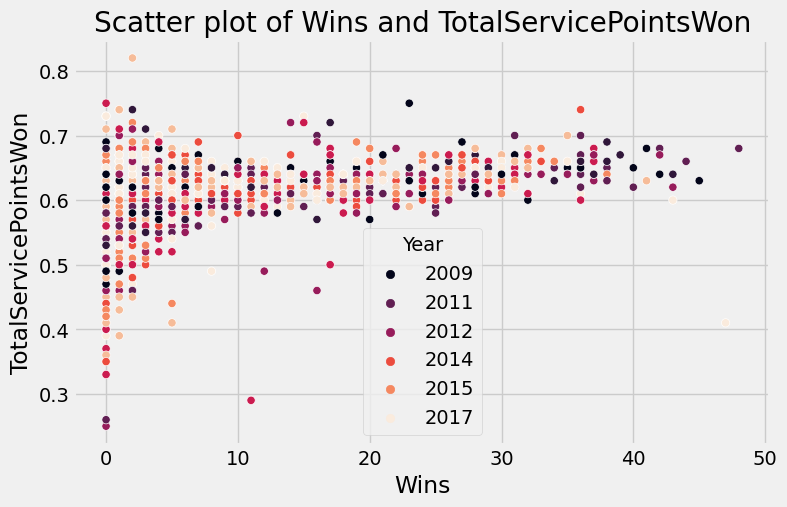

<Figure size 640x480 with 0 Axes>

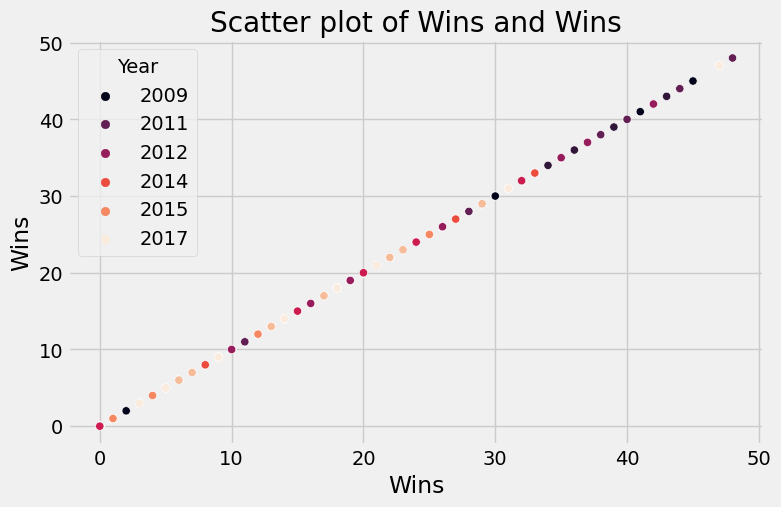

<Figure size 640x480 with 0 Axes>

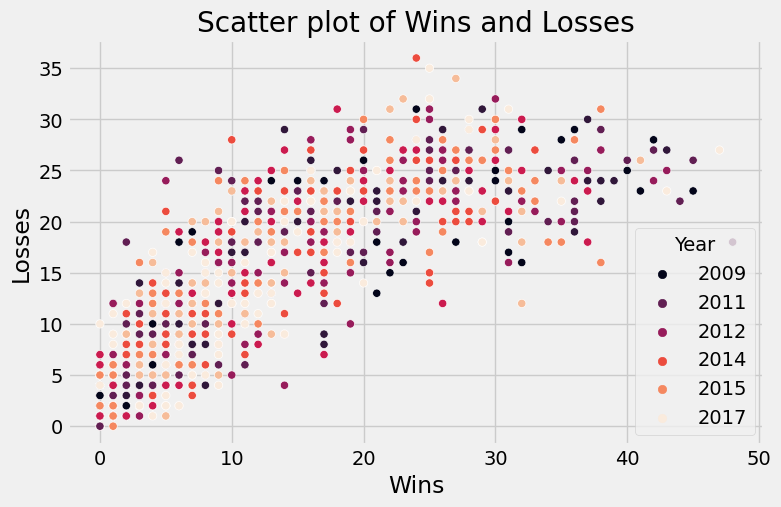

<Figure size 640x480 with 0 Axes>

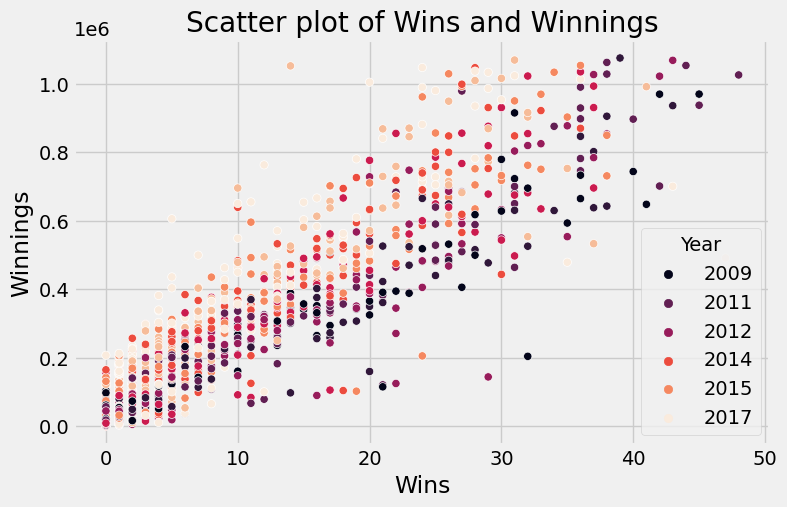

<Figure size 640x480 with 0 Axes>

In [584]:
for feature in columns:
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[8, 5])
    sns.scatterplot(x='Wins', y=feature, data=df, hue='Year', palette='rocket')
    plt.title(f'Scatter plot of Wins and {feature}')
    plt.xlabel('Wins')
    plt.ylabel(f'{feature}')
    plt.show()
    plt.clf()

In [585]:
columns

['Aces',
 'BreakPointsConverted',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'BreakPointsSaved',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ReturnGamesWon',
 'ReturnPointsWon',
 'ServiceGamesPlayed',
 'ServiceGamesWon',
 'TotalPointsWon',
 'TotalServicePointsWon',
 'Wins',
 'Losses',
 'Winnings']

In [586]:
## perform two feature linear regressions here:


In [587]:
X1 = df[['Wins', 'Losses']]
y = df[['Winnings']]
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=6)
mlr1 = LinearRegression()

In [588]:
model1 = mlr1.fit(x_train1, y_train1)
y_predict1 = model1.predict(x_test1)
mlr1.coef_



array([[16519.28849354,  8090.57550962]])

In [589]:
mlr1.score(x_train1, y_train1)

0.8579942559755236

In [590]:
mlr1.score(x_test1, y_test1)

0.8376507612151084

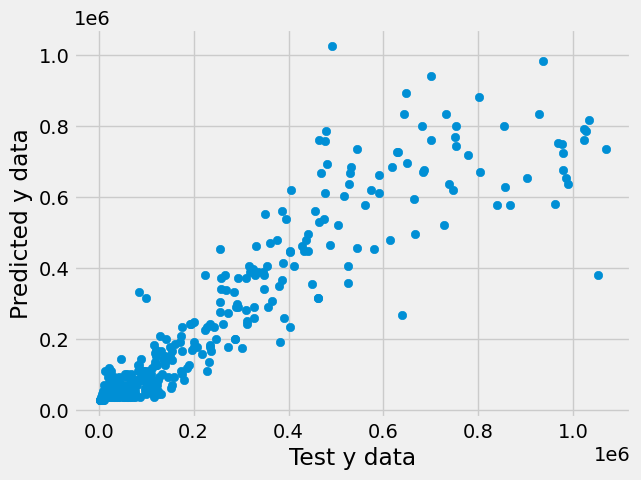

<Figure size 640x480 with 0 Axes>

In [591]:
plt.scatter(y_test1, y_predict1)
plt.xlabel('Test y data')
plt.ylabel('Predicted y data')
plt.show()
plt.clf()

In [592]:
## perform multiple feature linear regressions here:


In [593]:
X2 = df[['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'Wins', 'Losses']]
y = df[['Winnings']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y, train_size = 0.8, test_size = 0.2, random_state=6)
mlr2 = LinearRegression()
model2 = mlr2.fit(x_train2, y_train2)
y_predict2 = mlr2.predict(x_test2)

In [594]:
mlr2.score(x_train2, y_train2)

0.8730064094713876

In [595]:
mlr2.score(x_test2, y_test2)

0.8526258676368557